<a href="https://www.kaggle.com/code/ylenialongo/nyc-accidents?scriptVersionId=118224495" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-accidents-2020/NYC Accidents 2020.csv


SCENARIO
Motor vehicle collisions reported by the New York City Police Department from January-August 2020. Each record represents an individual collision, including the date, time and location of the accident (borough, zip code, street name, latitude/longitude), vehicles and victims involved, and contributing factors.

In [2]:
#LOAD THE DATA
traffic_filepath = "/kaggle/input/nyc-accidents-2020/NYC Accidents 2020.csv"
traffic_data = pd.read_csv(traffic_filepath)

REVIEW THE DATA

In [3]:
traffic_data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


Most of the accidents in New York occur in Brooklyn, also because it is one of the busiest neighborhoods in the city.

<AxesSubplot:xlabel='BOROUGH', ylabel='Count'>

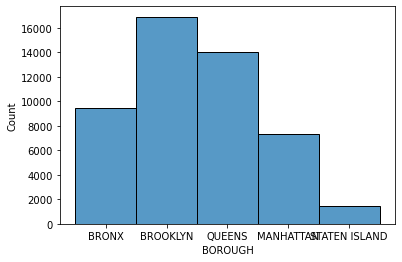

In [4]:
sns.histplot(traffic_data['BOROUGH'])

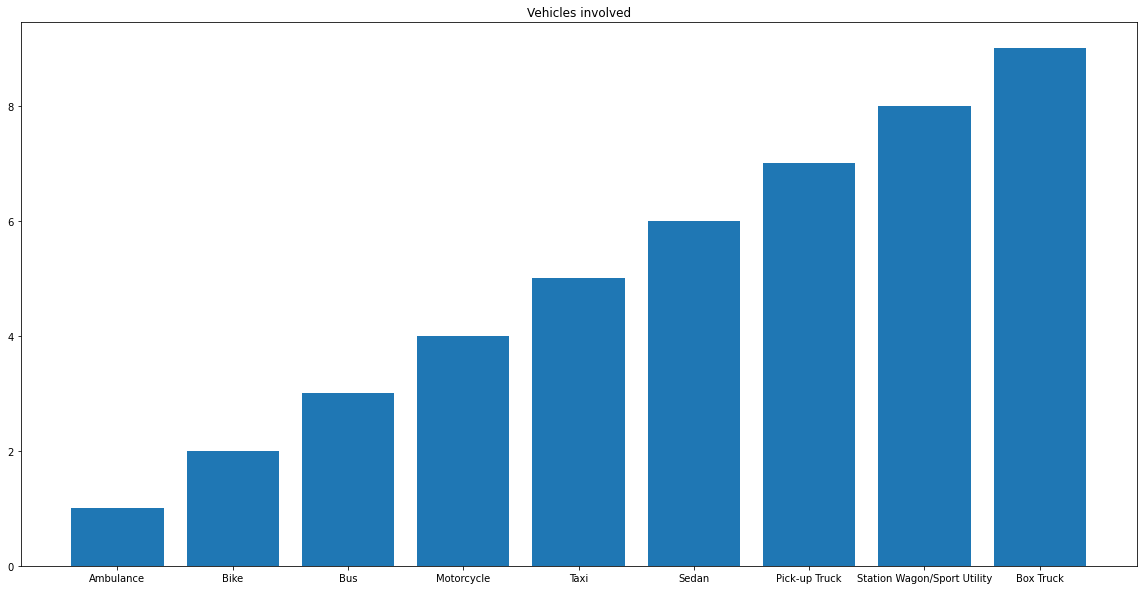

In [5]:
Vehicle = {'Ambulance':1, 'Bike':2, 'Bus':3, 'Motorcycle':4, 'Taxi':5, 'Sedan':6,'Pick-up Truck':7,'Station Wagon/Sport Utility':8, 'Box Truck':9}
plt.figure(figsize=(20,10))
plt.bar(list(Vehicle.keys()), list(Vehicle.values()))


plt.title("Vehicles involved")

plt.show()

Text(0, 0.5, 'Location')

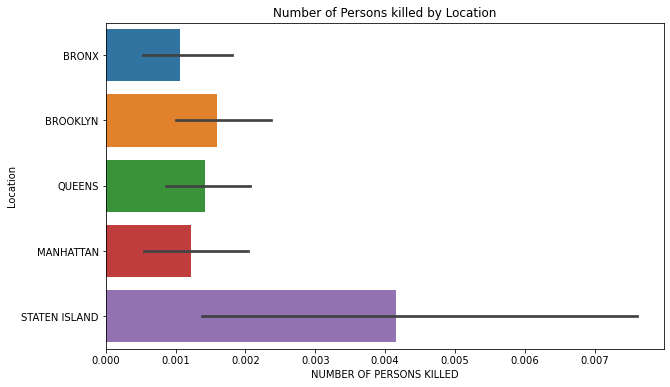

In [6]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Number of Persons killed by Location")

# Bar chart showing number of persons killed
sns.barplot(x=traffic_data['NUMBER OF PERSONS KILLED'], y=traffic_data['BOROUGH'])

# Add label for vertical axis
plt.ylabel("Location")

From the analysis we see that the neighborhood where most of the accidents occur is Brooklyn, being also one of the busiest areas of New York. But most of the deaths happen on Staten Island, which has a low accident rate, sadly almost all of them fatal. The vehicles that cause many accidents are trucks, many fewer are caused by cyclists, perhaps because they are more cautious in driving.